### Importing libraries and downloading dependencies

In [22]:
import pandas as pd
import os
from pathlib import Path
import re
from wordcloud import WordCloud
import gensim
from gensim.utils import simple_preprocess
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
import gensim.corpora as corpora
from pprint import pprint
import pyLDAvis.gensim
import pickle
import pyLDAvis

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\yangz\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Reading files of interest

In [2]:
cwd = Path.cwd()
parent_path = cwd.parent
transcript_path = os.path.join(parent_path, "transcription_texts/cmu_computer_graphics_chapter_1_voice_transcribed.txt").replace("\\", "/")
print(transcript_path)

c:/Users/yangz/OneDrive/Desktop/nus_masters/procrastinate/transcription_texts/cmu_computer_graphics_chapter_1_voice_transcribed.txt


In [3]:
with open(transcript_path) as src:
    transcript_text = src.readlines()[0]

print(transcript_text)

 All right, welcome to our first lecture on computer graphics. Today we're just going to do an overview of computer graphics with two main objectives. One is to try to understand broadly what computer graphics is all about, where does it show up in the world, and we're actually also going to really get our hands on a first algorithm for making images from 3D shapes. Also, I should say, all information about course logistics is on the webpage. Today, I'm really going to is on the webpage. Today I'm really gonna dive into the content. Okay, so what is computer graphics? Why are we here? What do we want to talk about this semester? When you think about computer graphics, probably an image like this one comes to mind, something from maybe an animated movie, visual effects. But what we really want to study in this class more fundamentally is how computer graphics shows up broadly in computer science, what its function is in digital computation, and why we need it. So if we think back to the

### Performing preprocessing on the content of the text

In [4]:
punc_removed = re.sub('[,\.!?]', '', transcript_text)
case_lowered = punc_removed.lower()

print(case_lowered)

 all right welcome to our first lecture on computer graphics today we're just going to do an overview of computer graphics with two main objectives one is to try to understand broadly what computer graphics is all about where does it show up in the world and we're actually also going to really get our hands on a first algorithm for making images from 3d shapes also i should say all information about course logistics is on the webpage today i'm really going to is on the webpage today i'm really gonna dive into the content okay so what is computer graphics why are we here what do we want to talk about this semester when you think about computer graphics probably an image like this one comes to mind something from maybe an animated movie visual effects but what we really want to study in this class more fundamentally is how computer graphics shows up broadly in computer science what its function is in digital computation and why we need it so if we think back to the earliest computers the

### Visualizing the result of the preprocessing

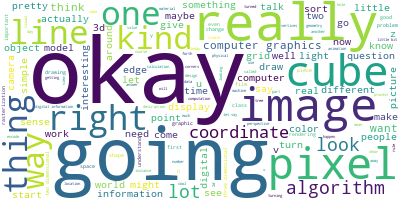

In [5]:
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3, contour_color="steelblue")

# Generating a single word cloud
wordcloud.generate(case_lowered)

# Visualizing the word cloud
wordcloud.to_image()

### Removing fillers since there are a lot of them in spoken texts

In [9]:
fillers_removed = re.sub('okay|right|going|thing|kind|really', '', case_lowered)
print(fillers_removed)

 all  welcome to our first lecture on computer graphics today we're just  to do an overview of computer graphics with two main objectives one is to try to understand broadly what computer graphics is all about where does it show up in the world and we're actually also  to  get our hands on a first algorithm for making images from 3d shapes also i should say all information about course logistics is on the webpage today i'm   to is on the webpage today i'm  gonna dive into the content  so what is computer graphics why are we here what do we want to talk about this semester when you think about computer graphics probably an image like this one comes to mind some from maybe an animated movie visual effects but what we  want to study in this class more fundamentally is how computer graphics shows up broadly in computer science what its function is in digital computation and why we need it so if we think back to the earliest computers they looked some like this these huge machines that took

### Checking the wordcloud again

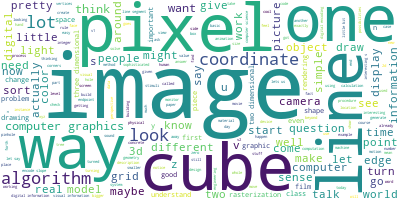

In [10]:
wordcloud.generate(fillers_removed)
wordcloud.to_image()

### Preparing the corpus for LDA Analysis

In [17]:
stop_words = stopwords.words("english")
stop_words.extend(["from", "subject", "re", "edu", "use"])

def sent_to_words(sentence):
    yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))

def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

data = fillers_removed
data_words = list(sent_to_words(data))
data_words = remove_stopwords(data_words)
print(data_words)

[['welcome', 'first', 'lecture', 'computer', 'graphics', 'today', 'overview', 'computer', 'graphics', 'two', 'main', 'objectives', 'one', 'try', 'understand', 'broadly', 'computer', 'graphics', 'show', 'world', 'actually', 'also', 'get', 'hands', 'first', 'algorithm', 'making', 'images', 'shapes', 'also', 'say', 'information', 'course', 'logistics', 'webpage', 'today', 'webpage', 'today', 'gonna', 'dive', 'content', 'computer', 'graphics', 'want', 'talk', 'semester', 'think', 'computer', 'graphics', 'probably', 'image', 'like', 'one', 'comes', 'mind', 'maybe', 'animated', 'movie', 'visual', 'effects', 'want', 'study', 'class', 'fundamentally', 'computer', 'graphics', 'shows', 'broadly', 'computer', 'science', 'function', 'digital', 'computation', 'need', 'think', 'back', 'earliest', 'computers', 'looked', 'like', 'huge', 'machines', 'took', 'entire', 'room', 'way', 'could', 'interface', 'machines', 'crude', 'might', 'punch', 'holes', 'card', 'gets', 'fed', 'computer', 'calculation', 's

### Corpus creation

In [19]:
# Creating a dictionary
id2word = corpora.Dictionary(data_words)

# Creating Corpus
texts = data_words

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# Checking
print(corpus)

[[(0, 1), (1, 1), (2, 2), (3, 1), (4, 2), (5, 1), (6, 1), (7, 1), (8, 1), (9, 1), (10, 25), (11, 1), (12, 1), (13, 1), (14, 2), (15, 1), (16, 2), (17, 4), (18, 1), (19, 26), (20, 3), (21, 3), (22, 11), (23, 1), (24, 2), (25, 1), (26, 2), (27, 1), (28, 4), (29, 5), (30, 19), (31, 1), (32, 1), (33, 1), (34, 3), (35, 1), (36, 1), (37, 1), (38, 1), (39, 3), (40, 5), (41, 3), (42, 8), (43, 8), (44, 1), (45, 1), (46, 1), (47, 1), (48, 2), (49, 1), (50, 1), (51, 2), (52, 1), (53, 2), (54, 1), (55, 1), (56, 2), (57, 1), (58, 12), (59, 1), (60, 1), (61, 1), (62, 1), (63, 5), (64, 1), (65, 2), (66, 1), (67, 1), (68, 2), (69, 3), (70, 1), (71, 1), (72, 2), (73, 1), (74, 7), (75, 2), (76, 3), (77, 4), (78, 3), (79, 1), (80, 1), (81, 1), (82, 1), (83, 1), (84, 1), (85, 3), (86, 5), (87, 4), (88, 2), (89, 3), (90, 2), (91, 1), (92, 1), (93, 1), (94, 3), (95, 6), (96, 4), (97, 11), (98, 1), (99, 11), (100, 1), (101, 3), (102, 1), (103, 2), (104, 2), (105, 1), (106, 2), (107, 1), (108, 1), (109, 1), (

### LDA Model Training

In [21]:
# We are choosing the top 5 topics to show here
num_topics = 5

lda_model = gensim.models.LdaMulticore(corpus=corpus, id2word=id2word, num_topics=num_topics)

# Print the Keyword in the 5 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.009*"computer" + 0.009*"cube" + 0.008*"image" + 0.008*"one" + '
  '0.008*"like" + 0.007*"little" + 0.006*"graphics" + 0.006*"way" + '
  '0.006*"line" + 0.006*"information"'),
 (1,
  '0.010*"computer" + 0.008*"one" + 0.008*"cube" + 0.008*"like" + '
  '0.007*"graphics" + 0.007*"image" + 0.007*"get" + 0.006*"little" + '
  '0.006*"want" + 0.006*"could"'),
 (2,
  '0.013*"computer" + 0.009*"like" + 0.008*"think" + 0.007*"image" + '
  '0.007*"graphics" + 0.007*"little" + 0.007*"one" + 0.007*"get" + '
  '0.007*"information" + 0.007*"line"'),
 (3,
  '0.012*"computer" + 0.011*"graphics" + 0.009*"like" + 0.009*"cube" + '
  '0.009*"image" + 0.008*"one" + 0.007*"want" + 0.007*"little" + 0.007*"line" '
  '+ 0.007*"information"'),
 (4,
  '0.014*"computer" + 0.010*"cube" + 0.009*"graphics" + 0.008*"one" + '
  '0.008*"little" + 0.008*"way" + 0.008*"information" + 0.008*"image" + '
  '0.008*"like" + 0.007*"think"')]


### Visualizing the topics

In [23]:
pyLDAvis.enable_notebook()

LDAvis_data_filepath = os.path.join(parent_path, "summarised_output/lda_prepared_"+str(num_topics)).replace("\\", "/")

# This is the expensive bit, make the Turn self_prep_viz = True if you wanna execute viz prep yourself

self_prep_viz = True

if self_prep_viz:
    LDAvis_prepared = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
    with open(LDAvis_data_filepath, "wb") as f:
        pickle.dump(LDAvis_prepared, f)

# Loading the pre-prepared pyLDAvis data from disk
with open(LDAvis_data_filepath, "rb") as f:
    LDAvis_prepared = pickle.load(f)

html_file_path = os.path.join(parent_path, "summarised_output/ldavis_prepared_"+str(num_topics)+".html").replace("\\", "/")

pyLDAvis.save_html(LDAvis_prepared, html_file_path)

LDAvis_prepared

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.002939  0.000653       1        1  97.793784
3      0.000972 -0.001495       2        1   2.191778
2     -0.000698  0.001000       3        1   0.004818
0     -0.001537 -0.000220       4        1   0.004812
1     -0.001677  0.000063       5        1   0.004808, topic_info=             Term       Freq      Total Category  logprob  loglift
205      computer  58.000000  58.000000  Default  30.0000  30.0000
257          cube  40.000000  40.000000  Default  29.0000  29.0000
493      graphics  40.000000  40.000000  Default  28.0000  28.0000
751           one  35.000000  35.000000  Default  27.0000  27.0000
622          like  32.000000  32.000000  Default  26.0000  26.0000
...           ...        ...        ...      ...      ...      ...
299   dimensional   0.000777  19.835314   Topic5  -5.5716  -0.2055
19      algorithm   0.000878  25.045566   Topic5  -5.4483  -0.3155
814         pixel   0.000812  22.304835   Topic5  -5.5269  -0.2782
1235         well   0.000807  23.825033   Topic5  -5.5329  -0.3501
718          need   0.000741  21.046470   Topic5  -5.6189  -0.3121

[399 rows x 6 columns], token_table=      Topic      Freq        Term
term                             
9         1  0.808058      actual
10        1  0.991194    actually
14        1  1.011634   aesthetic
19        1  0.998181   algorithm
22        1  0.976247  algorithms
...     ...       ...         ...
1235      2  0.041973        well
1239      1  0.832187       white
1250      1  0.959785        work
1253      1  0.999375       works
1263      1  0.976800         xyz

[203 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 4, 3, 1, 2])